# Customer Churn Prediction

## Problem Statement
Customer churn refers to when customers stop doing business with a company. It is a major problem in subscription-based businesses(telecom, streaming, SaaS).

**Goal:** Predict which customers are likely to churn so the business can take the appropriate action. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.shape
df['Churn'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Dataset Overview
- **Source:** [Telco Customer Churn Dataset (Kaggle)](https://www.kaggle.com/blastchar/telco-customer-churn)  
- **Rows:** ~7,000  
- **Features:** Demographic info, account details, services used, billing information  
- **Target Variable:** `Churn` (Yes = customer left, No = stayed)

In [4]:
#check for missing vals
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##  Data Cleaning
- Handled missing values in `TotalCharges`  
- Converted categorical variables using **Label Encoding**  
- Dropped `customerID` (not useful for prediction)  

In [5]:
#fixing TotalCharges col
df['TotalCharges'].dtype
df['TotalCharges'] = pd.to_numeric(df['TechSupport'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)



## Exploratory Data Analysis (EDA)
The Telco Customer Churn dataset contains customer demographics, account information, and service usage details. After cleaning the data, several patterns emerged:

**1. Churn Distribution**

- About *26–27% of customers churned*.

- The dataset is imbalanced, meaning accuracy alone isn’t a reliable evaluation metric.

**2. Contract Type**

- Customers on month-to-month contracts churned the most.

- Those on one- or two-year contracts had significantly lower churn rates.

**3. Tenure**

- Newer customers (short tenure) are much more likely to leave.

- Long-term customers are less likely to churn, suggesting retention improves with loyalty.

**4. Monthly Charges**

- Customers with higher monthly charges churn at higher rates.

- Many churned customers fall in the $70–$100/month range.

**5. Internet Service**

- Fiber optic customers churn more frequently compared to DSL customers.

- No-internet-service customers had almost no churn.

C:\Users\lizbe\AppData\Local\Temp\ipykernel_19836\4245243582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


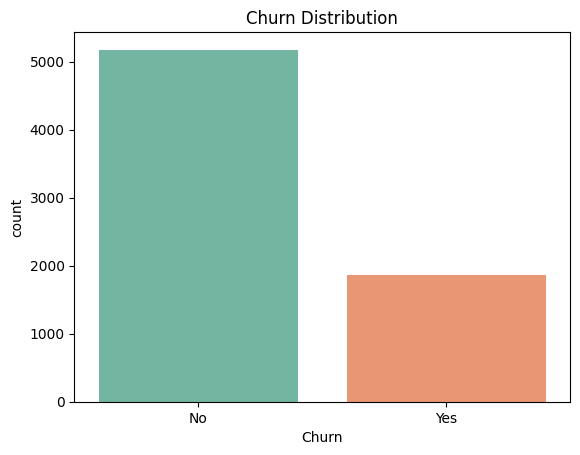

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#churn distribution
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True)


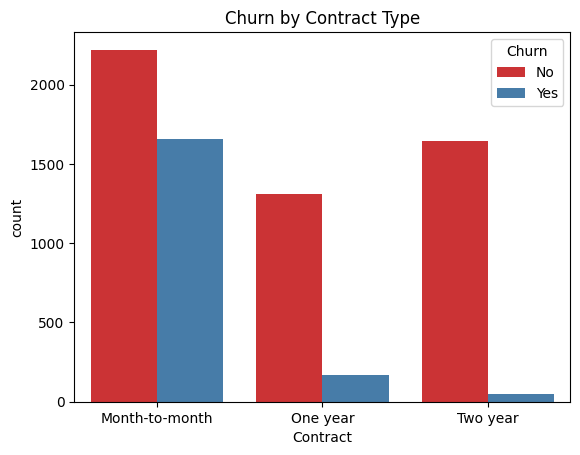

In [7]:
#churn by contract type
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title("Churn by Contract Type")
plt.show()


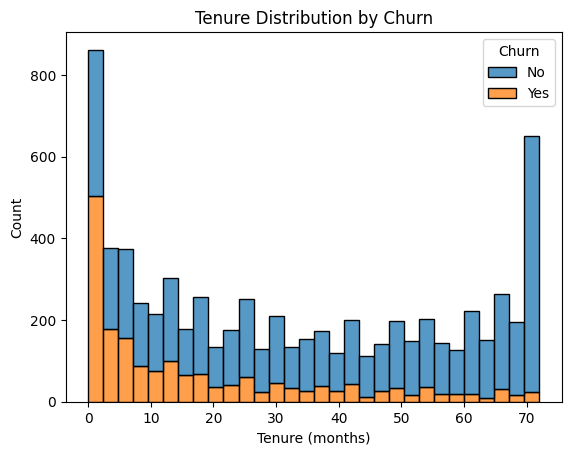

In [8]:
#churn vs tenure
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=False, multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.show()


C:\Users\lizbe\AppData\Local\Temp\ipykernel_19836\2591728857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Pastel1')


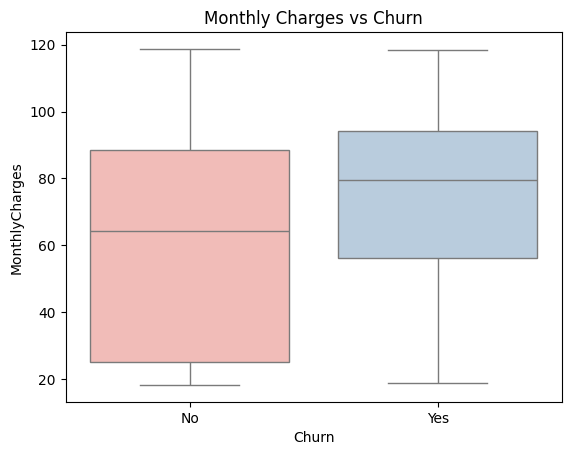

In [9]:
#Monthly charges vs churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Pastel1')
plt.title("Monthly Charges vs Churn")
plt.show()


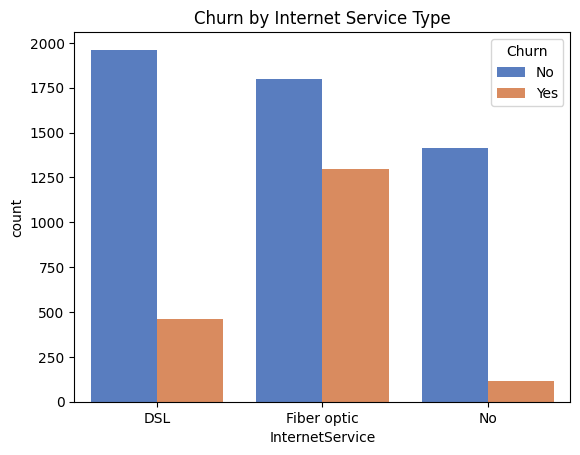

In [10]:
# internet service vs churn
sns.countplot(x='InternetService', hue='Churn', data=df, palette='muted')
plt.title("Churn by Internet Service Type")
plt.show()

In [11]:

#converting Y/N to 1/0
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

#label encoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
    
#drop id col
df = df.drop('customerID', axis=1)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0.0,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.0,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,0.0,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,0.0,1


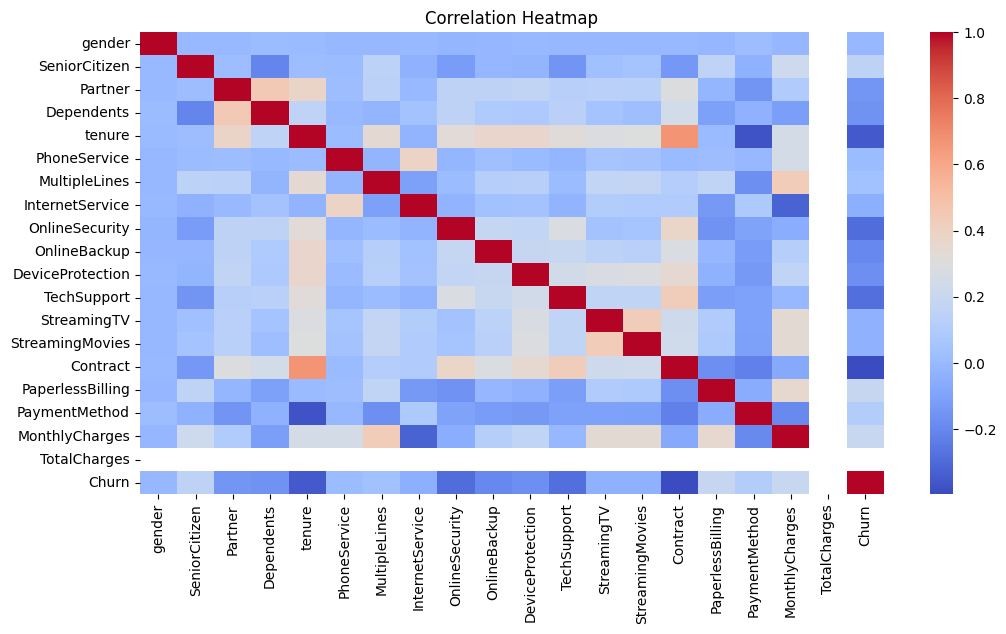

In [12]:
# corelation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Modeling
- **Train/Test Split:** 80/20 with stratification  
- **Baseline Model:** Logistic Regression  
- **Tree-Based Model:** Random Forest Classifier  
- **Hyperparameter Tuning:** GridSearchCV with `class_weight='balanced'`

In [13]:
# target var
y = df['Churn']

#features
X = df.drop('Churn', axis=1)

In [14]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
import joblib

# Save the list of columns used in training
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']

In [16]:
#Scaling for log reg 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
#train baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7998580553584103
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [18]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7821149751596878
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



## Model Evaluation
- **Logistic Regression Accuracy:** ~0.79  
- **Random Forest Accuracy:** ~0.78 (improved recall with tuning)  
- **Confusion Matrix:** Show true positives/false negatives  
- **ROC Curve + AUC:** Evaluates model discrimination power  
- **Feature Importance:** Identified top churn drivers (Contract, Tenure, MonthlyCharges)

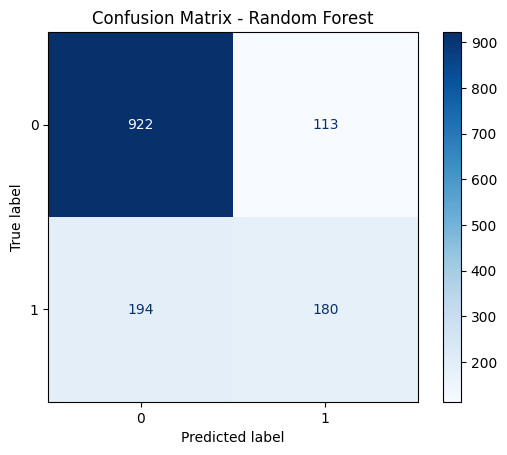

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)  # use predictions from your model
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


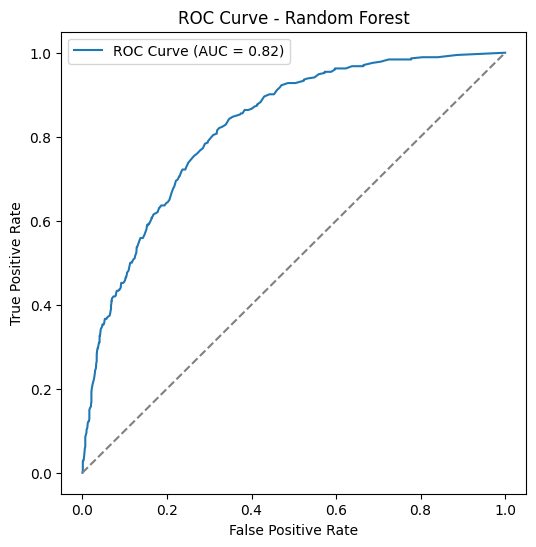

In [20]:
#ROC curve & AUC
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf.predict_proba(X_test)[:,1]  # churn probability

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


C:\Users\lizbe\AppData\Local\Temp\ipykernel_19836\3429337112.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")


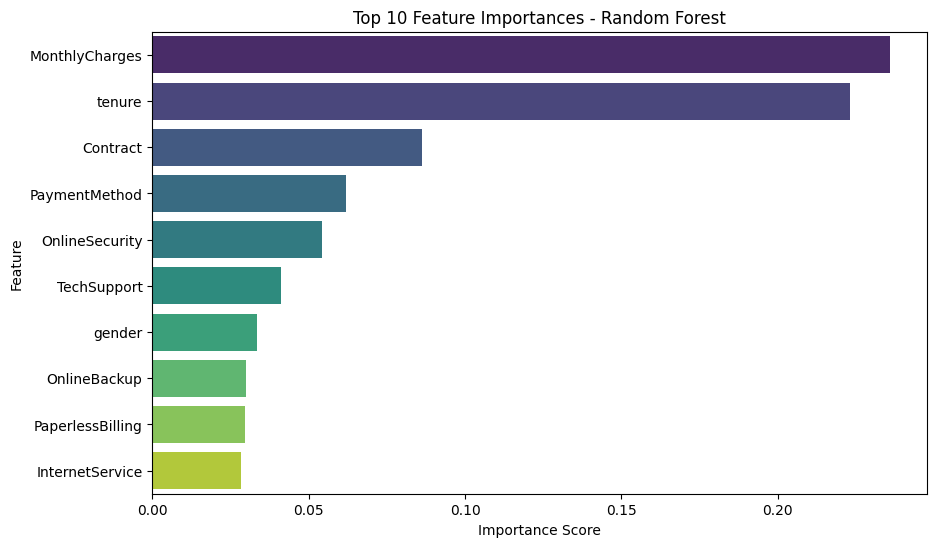

In [21]:
#Feature Importance
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [22]:
#tuning random forest for higher roc-auc
from sklearn.model_selection import GridSearchCV
import joblib

param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  # helps with churn imbalance
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Save the fitted model
joblib.dump(best_rf, "churn_model.pkl")

print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best ROC-AUC: 0.8448005113668599


## Results & Insights
- Both models perform similarly, but **Random Forest improves recall**, catching more churners.  
- Key churn drivers: **month-to-month contracts, high monthly charges, short tenure**.  
- **Business Insight:** Offering discounts or incentives to new, high-cost, month-to-month customers could reduce churn. 

## Conclusion
This project demonstrates how machine learning can help businesses:  
- Identify customers at risk of churning  
- Target retention efforts to improve customer loyalty  
- Save costs by reducing churn  

## Tech Stack
- Python (pandas, numpy, scikit-learn, matplotlib, seaborn)  
- Jupyter Notebook  
- Streamlit for deployment 